# Import libraries

## TODO: move to requirements.txt

In [62]:
!pip install stop-words
!pip install wordcloud

You should consider upgrading via the 'c:\users\saox\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\saox\anaconda3\python.exe -m pip install --upgrade pip' command.


In [75]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saox\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
import pandas as pd
import numpy as np
import re
from nltk.probability import FreqDist
from nltk.corpus import stopwords as swords
from stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load the dataset

In [3]:
df = pd.read_pickle('initiatives.pkl') 

In [4]:
df.head()

,_id,author_parliamentarygroups,created,initiative_type,initiative_type_alt,reference,status,tagged,title,updated,url,tags,topics,history,author_others,place,content,extra,author_deputies
0,8340a50c3e322491545cf6c40b0b3d29ed03cb85,[Grupo Parlamentario Ciudadanos],{'$date': '2020-06-02T00:00:00Z'},84,Moción de reprobación a miembros del Gobierno,084/000004,Desconocida,True,"Reprobación del Ministro del Interior, don Fer...",{'$date': '2020-06-09T00:00:00Z'},https://www.congreso.es/web/guest/indice-de-in...,[],[],NaN,NaN,NaN,NaN,NaN,NaN
1,06709837ef704e5aaacfa6ea400517c560ebdd53,[Grupo Parlamentario Republicano],{'$date': '2021-03-18T00:00:00Z'},84,Moción de reprobación a miembros del Gobierno,084/000022,Desconocida,True,Reprobación de la Ministra de Defensa.,{'$date': '2021-03-23T00:00:00Z'},https://www.congreso.es/web/guest/indice-de-in...,[],[],NaN,NaN,NaN,NaN,NaN,NaN
2,08cee188414ee529ca4dc998340791bae832029f,[Grupo Parlamentario Popular],{'$date': '2021-03-25T00:00:00Z'},84,Moción de reprobación a miembros del Gobierno,084/000023,Desconocida,True,Reprobación de la Ministra de Educación y Form...,{'$date': '2021-04-06T00:00:00Z'},https://www.congreso.es/web/guest/indice-de-in...,[],[],NaN,NaN,NaN,NaN,NaN,NaN
3,70e6ca135dfb404955c15cf109c2a3614951528f,[Grupo Parlamentario Ciudadanos],{'$date': '2021-02-08T00:00:00Z'},84,Moción de reprobación a miembros del Gobierno,084/000021,Desconocida,True,Reprobación del Vicepresidente Segundo del Gob...,{'$date': '2021-02-16T00:00:00Z'},https://www.congreso.es/web/guest/indice-de-in...,[],[],NaN,NaN,NaN,NaN,NaN,NaN
4,48643b81ce1cd97cbe74ceb711eaafb7ead9241f,[Grupo Parlamentario Popular],{'$date': '2020-06-02T00:00:00Z'},84,Moción de reprobación a miembros del Gobierno,084/000003,Desconocida,True,Reprobación del Ministro del Interior.,{'$date': '2020-06-09T00:00:00Z'},https://www.congreso.es/web/guest/indice-de-in...,[],[],NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(110192, 19)

# Get stop words

# Define helper functions

In [79]:
def create_df_from_json(file_path, columns_to_keep=['content','title','initiative_type_alt'],field_name='initiatives'):
    with open(file_path,'r', encoding="utf8") as f:
        data = json.loads(f.read())
    data_frame = pd.json_normalize(data,record_path=field_name)
    data_frame = data_frame[columns_to_keep]
    return(data_frame)

def retrieve_stop_words():
    spanish_stopwords = swords.words('spanish')
    stop_words_spanish = get_stop_words('spanish')
    stopwords = list(set(spanish_stopwords + stop_words_spanish))
    return stopwords

def space_out_your_text(row):
    doc = nlp(row)
    cleaned = ""
    for token in doc:
        if token.pos_ not in ("PUNCT","ADP","SCONJ","PRON","CCONJ"):
            #print(token.text, token.lemma_, token.pos_, token.dep_)
            cleaned+=token.lemma_+" "
    return cleaned

#remove special characters
def replaced_charac(row):
    for word, initial in {".":" ", "-":" ","/":" ","@":" ","#":" ","(":" ",")":" ",'"' : ""}.items():
        row = row.replace(word, initial) 
    return row

def remove_stopwords(row, stopwords):
    removed_stopwords = [word for word in row.split(" ") if word not in stopwords and word.replace(" ","")!=""]
    return removed_stopwords


def remove_numbers(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    list =  [string for string in list if string != ""]
    return list


def word_count(df):
    tf = df['text'].apply(lambda x: FreqDist(x)).sum(axis = 0)
    tf2 = dict(tf)
    data_items = tf2.items()
    data_list = list(data_items)
    freq_dataframe = pd.DataFrame(data_list)
    freq_dataframe.columns = ['Word','Counts']
    freq_dataframe = freq_dataframe.sort_values(by="Counts",ascending=False)
    pd.set_option("max_rows", None)
    return freq_dataframe

# Get stopwords

In [ ]:
stop_words = retrieve_stop_words() 

# Demo Wordcloud

Interpelación urgente


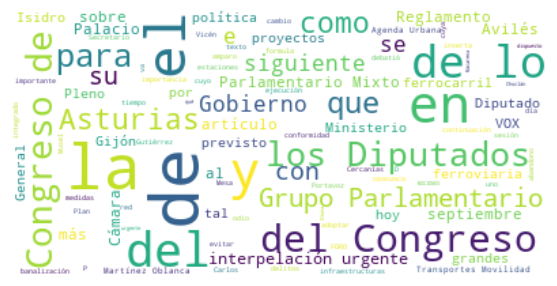

Moción consecuencia de interpelación urgente


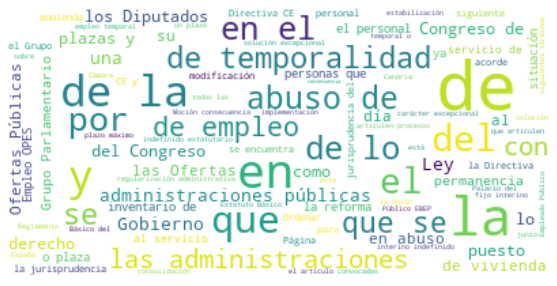

Otras comparecencias en Comisión
Proposición de ley del Senado


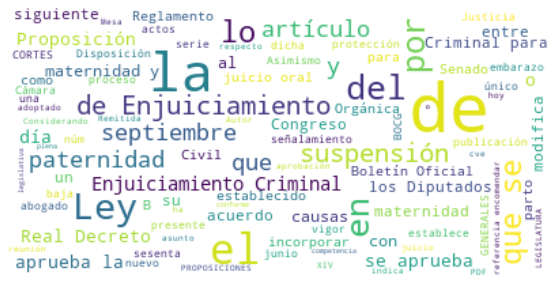

Proposición no de Ley en Comisión


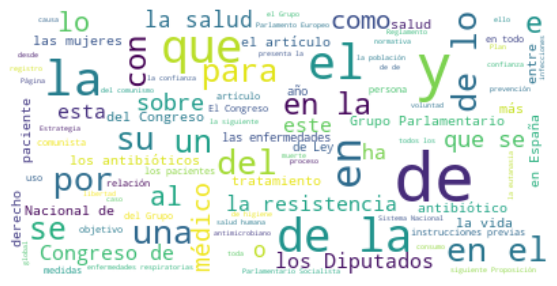

Propuesta de reforma de Estatuto de Autonomía


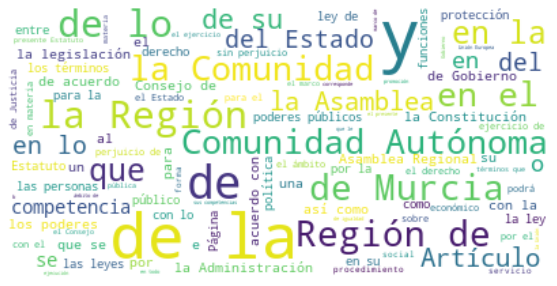

Proyecto de ley


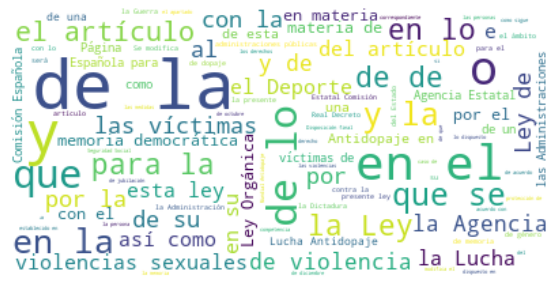

Proyecto de reforma constitucional


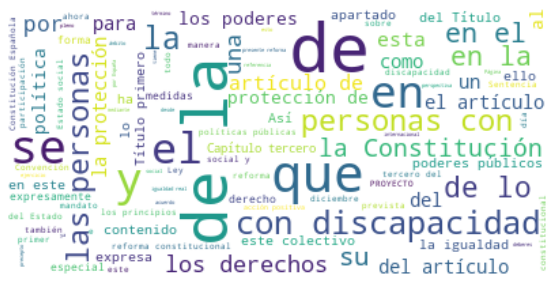

Solicitud de informe a Comunidad Autónoma (art. 7)


In [64]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# example usage: test_df = create_df_from_json('./small-batch.json')
test_df = create_df_from_json('small-batch.json') 

grouped = test_df.groupby("initiative_type_alt")['content'].apply(lambda tags: ','.join(tags))

def show_cloud(i):
    text = grouped[i]
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(12,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

for i, row in grouped.iteritems():
    unique_id = i   
    print(i)    
    if len(grouped[i])>0:
        show_cloud(i) 

# Apply transformations one-by-one

In [ ]:
#remove punctuations, tabs, etc 
df.apply(lambda row:space_out_your_text(row['lowered']),axis=1)
#Lower case
df.apply(lambda row: row['text'].lower(), axis=1)
df['removed_num'] = df.apply(lambda row: remove_numbers(row['text']), axis=1)    

In [ ]:
df2['tokenized_sents'] = df2.apply(lambda row: nlp(row['removed_num']), axis=1)
df2['tokenized_sents_str'] = df2.tokenized_sents.apply(lambda x:str(x))

infreq = freq_dataframe[freq_dataframe['Counts'] < 3 ]['Word'].tolist()


df2['removed_infreq'] = df2.tokenized_sents_str.apply(lambda x: remove_stopwords(x,infreq))
df2['removed_infreq_str'] = df2.removed_infreq.apply(lambda x:str(x))



v = TfidfVectorizer()
x = v.fit_transform(df2['removed_infreq_str'])
x.todense()
len(v.vocabulary_)